In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import re

In [2]:
data_dir = 'C:/Users/36205/Desktop/Gitre/F1'
import os
os.chdir(data_dir)
pldf = pd.read_csv(data_dir+"/season1819data.csv", delimiter=',')
pldf.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [3]:
# Div = League Division
# Date = Match Date (dd/mm/yy)
# HomeTeam = Home Team
# AwayTeam = Away Team
# FTHG = Full Time Home Team Goals
# FTAG = Full Time Away Team Goals
# FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
# HTHG = Half Time Home Team Goals
# HTAG = Half Time Away Team Goals
# HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

# Match Statistics (where available)

# HS = Home Team Shots
# AS = Away Team Shots
# HST = Home Team Shots on Target
# AST = Away Team Shots on Target
# HC = Home Team Corners
# AC = Away Team Corners
# HF = Home Team Fouls Committed
# AF = Away Team Fouls Committed
# HY = Home Team Yellow Cards
# AY = Away Team Yellow Cards
# HR = Home Team Red Cards
# AR = Away Team Red Cards

# Key to 1X2 (match) betting odds data:

# B365H = Bet365 home win odds
# B365D = Bet365 draw odds
# B365A = Bet365 away win odds

In [4]:
#Adatok átalakítása --> Felesleges oszlopokat kiszedtem a dataframeből

fdf = pldf.drop(columns=['Div'])
fdf = fdf.drop(columns=['Date'])
fdf = fdf.drop(columns=['Referee'])
fdf.drop(fdf.iloc[:, 23:], inplace = True, axis = 1)
fdf.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,Man United,Leicester,2,1,H,1,0,H,8,13,...,8,2,5,2,1,0,0,1.57,3.9,7.50
1,Bournemouth,Cardiff,2,0,H,1,0,H,12,10,...,9,7,4,1,1,0,0,1.90,3.6,4.50
2,Fulham,Crystal Palace,0,2,A,0,1,A,15,10,...,11,5,5,1,2,0,0,2.50,3.4,3.00
3,Huddersfield,Chelsea,0,3,A,0,2,A,6,13,...,8,2,5,2,1,0,0,6.50,4.0,1.61
4,Newcastle,Tottenham,1,2,A,1,2,A,15,15,...,12,3,5,2,2,0,0,3.90,3.5,2.04


In [5]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HomeTeam  380 non-null    object 
 1   AwayTeam  380 non-null    object 
 2   FTHG      380 non-null    int64  
 3   FTAG      380 non-null    int64  
 4   FTR       380 non-null    object 
 5   HTHG      380 non-null    int64  
 6   HTAG      380 non-null    int64  
 7   HTR       380 non-null    object 
 8   HS        380 non-null    int64  
 9   AS        380 non-null    int64  
 10  HST       380 non-null    int64  
 11  AST       380 non-null    int64  
 12  HF        380 non-null    int64  
 13  AF        380 non-null    int64  
 14  HC        380 non-null    int64  
 15  AC        380 non-null    int64  
 16  HY        380 non-null    int64  
 17  AY        380 non-null    int64  
 18  HR        380 non-null    int64  
 19  AR        380 non-null    int64  
 20  B365H     380 non-null    float6

In [6]:
#Létrehoztam egy győztes mezőt, hogy ne csak a FTR-ből lássam mi lett a meccs eredménye
fdf['Winner'] = ''
fdf.loc[(fdf['FTR'] == 'H'), 'Winner'] = fdf['HomeTeam']  
fdf.loc[(fdf['FTR'] == 'D'), 'Winner'] = 'Draw'
fdf.loc[(fdf['FTR'] == 'A'), 'Winner'] = fdf['AwayTeam'] 
fdf.head(10)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Winner
0,Man United,Leicester,2,1,H,1,0,H,8,13,...,2,5,2,1,0,0,1.57,3.9,7.50,Man United
1,Bournemouth,Cardiff,2,0,H,1,0,H,12,10,...,7,4,1,1,0,0,1.90,3.6,4.50,Bournemouth
2,Fulham,Crystal Palace,0,2,A,0,1,A,15,10,...,5,5,1,2,0,0,2.50,3.4,3.00,Crystal Palace
3,Huddersfield,Chelsea,0,3,A,0,2,A,6,13,...,2,5,2,1,0,0,6.50,4.0,1.61,Chelsea
4,Newcastle,Tottenham,1,2,A,1,2,A,15,15,...,3,5,2,2,0,0,3.90,3.5,2.04,Tottenham
5,Watford,Brighton,2,0,H,1,0,H,19,6,...,8,2,2,2,0,0,2.37,3.2,3.40,Watford
6,Wolves,Everton,2,2,D,1,1,D,11,6,...,3,6,0,1,0,1,2.37,3.3,3.30,Draw
7,Arsenal,Man City,0,2,A,0,1,A,9,17,...,2,9,2,2,0,0,4.00,3.8,1.95,Man City
8,Liverpool,West Ham,4,0,H,2,0,H,18,5,...,5,4,1,2,0,0,1.25,6.5,14.00,Liverpool
9,Southampton,Burnley,0,0,D,0,0,D,18,16,...,8,5,0,1,0,0,1.85,3.5,5.00,Draw


In [7]:
#kigyűjtöttem a nyertes oddsokat
fdf['WOdds'] = ''
fdf.loc[(fdf['FTR'] == 'H'), 'WOdds'] = fdf['B365H'].astype('float')
fdf.loc[(fdf['FTR'] == 'D'), 'WOdds'] = fdf['B365D'].astype('float')
fdf.loc[(fdf['FTR'] == 'A'), 'WOdds'] = fdf['B365A'].astype('float')
fdf = fdf.astype({'WOdds':'float'})
fdf

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AC,HY,AY,HR,AR,B365H,B365D,B365A,Winner,WOdds
0,Man United,Leicester,2,1,H,1,0,H,8,13,...,5,2,1,0,0,1.57,3.90,7.50,Man United,1.57
1,Bournemouth,Cardiff,2,0,H,1,0,H,12,10,...,4,1,1,0,0,1.90,3.60,4.50,Bournemouth,1.90
2,Fulham,Crystal Palace,0,2,A,0,1,A,15,10,...,5,1,2,0,0,2.50,3.40,3.00,Crystal Palace,3.00
3,Huddersfield,Chelsea,0,3,A,0,2,A,6,13,...,5,2,1,0,0,6.50,4.00,1.61,Chelsea,1.61
4,Newcastle,Tottenham,1,2,A,1,2,A,15,15,...,5,2,2,0,0,3.90,3.50,2.04,Tottenham,2.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Liverpool,Wolves,2,0,H,1,0,H,13,7,...,1,0,2,0,0,1.30,6.00,11.00,Liverpool,1.30
376,Man United,Cardiff,0,2,A,0,1,A,26,13,...,2,3,3,0,0,1.28,6.50,11.00,Cardiff,11.00
377,Southampton,Huddersfield,1,1,D,1,0,H,10,10,...,3,0,1,0,0,1.44,4.75,8.50,Draw,4.75
378,Tottenham,Everton,2,2,D,1,0,H,11,17,...,4,0,2,0,0,2.20,3.50,3.50,Draw,3.50


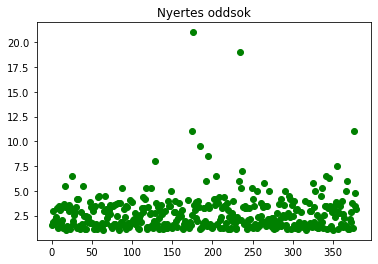

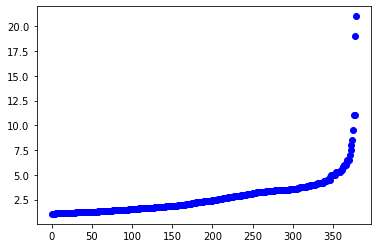

In [8]:
#Szemláltetésnek kirajzolom pontonként a nyertes oddsokat
#jól látható, hogy nagyon kevés nagy odds nyert
df = fdf['WOdds']

x = np.arange(380)
y = np.array(df)
z = np.sort(df)

plt.title("Nyertes oddsok")

plt.scatter(x, y, color="green")
plt.show()

plt.scatter(x,z,color="blue")
plt.show()

In [9]:
bigwin = len(fdf.loc[fdf['WOdds'] >= 10])
print("Mindössze", bigwin,"db 10-es vagy annál nagyobb odds nyert,")

decentwin = len(fdf.loc[(fdf['WOdds'] <= 10) & (fdf['WOdds'] >= 5)])
print("Viszont", decentwin,"db 5-ös és 10-es odds közti nyert.")

print("Végül a tutik:")
allfixwin = len(fdf.loc[fdf["B365H"] <= 1.5]) + len(fdf.loc[fdf["B365D"] <= 1.5]) + len(fdf.loc[fdf["B365A"] <= 1.5])
fixwin = len(fdf.loc[fdf['WOdds'] <= 1.5])
notthatfixwin = allfixwin - fixwin

print("A(z)",allfixwin,"db 1,5 vagy azalatti szorzóból csak",fixwin,"db lett nyertes")


Mindössze 4 db 10-es vagy annál nagyobb odds nyert,
Viszont 28 db 5-ös és 10-es odds közti nyert.
Végül a tutik:
A(z) 116 db 1,5 vagy azalatti szorzóból csak 96 db lett nyertes


In [10]:
#Legnagyobb egyszeres végeredméynre tett fogadási nyereményt ez a meccs hozta, ha valaki Crystal Palacera tette a pénzét 
(fdf.sort_values(by='WOdds', ascending=False)).head(1)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AC,HY,AY,HR,AR,B365H,B365D,B365A,Winner,WOdds
176,Man City,Crystal Palace,2,3,A,1,2,A,19,5,...,0,0,4,0,0,1.14,10.0,21.0,Crystal Palace,21.0


In [11]:
#Fulham össze meccse látható külön
fulham = fdf.loc[(fdf['HomeTeam'] == 'Fulham') | (fdf['AwayTeam'] == 'Fulham')]
fulham

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AC,HY,AY,HR,AR,B365H,B365D,B365A,Winner,WOdds
2,Fulham,Crystal Palace,0,2,A,0,1,A,15,10,...,5,1,2,0,0,2.50,3.40,3.00,Crystal Palace,3.00
14,Tottenham,Fulham,3,1,H,1,0,H,25,10,...,2,0,0,0,0,1.28,6.00,12.00,Tottenham,1.28
26,Fulham,Burnley,4,2,H,3,2,H,25,12,...,4,2,1,0,0,2.00,3.40,4.33,Fulham,2.00
30,Brighton,Fulham,2,2,D,0,1,A,15,10,...,1,3,3,0,0,2.30,3.40,3.40,Draw,3.40
43,Man City,Fulham,3,0,H,2,0,H,28,9,...,4,0,0,0,0,1.12,10.00,26.00,Man City,1.12
54,Fulham,Watford,1,1,D,0,1,A,15,11,...,8,2,1,0,0,2.54,3.50,2.90,Draw,3.50
62,Everton,Fulham,3,0,H,0,0,D,19,6,...,1,0,3,0,0,1.75,4.20,4.75,Everton,1.75
77,Fulham,Arsenal,1,5,A,1,1,D,21,9,...,2,2,0,0,0,5.25,4.33,1.66,Arsenal,1.66
81,Cardiff,Fulham,4,2,H,2,2,D,22,9,...,4,3,3,0,0,2.50,3.50,2.95,Cardiff,2.50
91,Fulham,Bournemouth,0,3,A,0,1,A,11,12,...,5,2,1,1,0,2.90,3.75,2.40,Bournemouth,2.40


In [12]:
#Fulham győzelmei, döntetlenjei,vereségei
record = len(fulham.loc[fulham['Winner'] == 'Fulham']),len(fulham.loc[fulham['Winner'] == 'Draw']),len( fulham.loc[ (fulham['Winner'] != 'Fulham')  &  (fulham['Winner'] != 'Draw')])
print("A Fulham győzelmei, döntetlenjei, vereségei:",record)

A Fulham győzelmei, döntetlenjei, vereségei: (7, 5, 26)


In [13]:
#Fulham összesen ennyi pontot szerzett
points = len(fulham.loc[fulham['Winner'] == 'Fulham'])*3 + len(fulham.loc[fulham['Winner'] == 'Draw'])
print("A Fulham bajnoki pontjai:",points)

A Fulham bajnoki pontjai: 26


In [14]:
#2018-2019-es szezont a Manchester City nyerte
#Megnézem mennyi pénzt nyertem/vesztettem volna, ha minden meccsen arra fogadok, hogy nyer a City

city = fdf.loc[(fdf['HomeTeam'] == 'Man City') | (fdf['AwayTeam'] == 'Man City')]
city.insert(25,'Profit',-500)
city.loc[(city['Winner'] == 'Man City'), 'Profit'] = ((city['WOdds']*500)-500)
print("A profit:", sum(city['Profit']),"Ft")

A profit: 1375.0 Ft


C:\Users\36205\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
